### Iris Species Classification using Logistic Regression

A machine learning project implementing multiclass classification on the Iris dataset using logistic regression.

### Project Documentation

#### Overview
This project demonstrates the complete machine learning pipeline for multiclass classification:
- Exploratory Data Analysis (EDA)
- Feature visualization
- Model training and evaluation
- Performance analysis using confusion matrix and classification metrics

#### Results
- **Model**: Logistic Regression (multiclass)
- **Accuracy**: 100% on test set (30 samples)
- **Perfect classification** achieved for all three species
- No misclassifications observed

#### Key Findings
1. The Iris dataset features are highly separable, enabling perfect classification
2. Logistic regression is sufficient for this linearly separable problem
3. All 30 test samples were correctly classified:
   - Setosa: 10/10 correct
   - Versicolor: 12/12 correct  
   - Virginica: 8/8 correct

### Importing the required modules

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

### Importing and understanding the dataset

In [66]:
df = pd.read_csv("Iris.csv")

In [67]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
df.columns = df.columns.str.lower()

In [69]:
df.head()

,id,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             150 non-null    int64  
 1   sepallengthcm  150 non-null    float64
 2   sepalwidthcm   150 non-null    float64
 3   petallengthcm  150 non-null    float64
 4   petalwidthcm   150 non-null    float64
 5   species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [71]:
#understanding the category distribution
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Visualizing the categories based on potential features

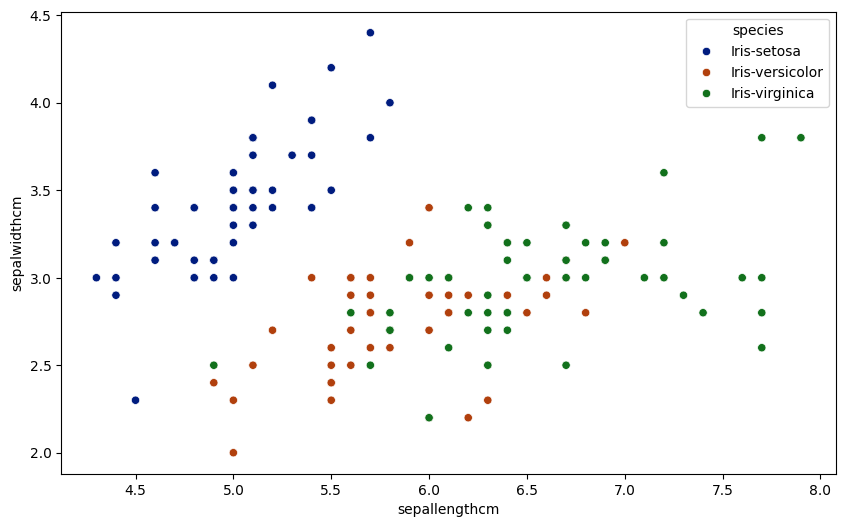

In [72]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['sepallengthcm'], y = df['sepalwidthcm'], hue = df['species'], palette = 'dark')
plt.show()

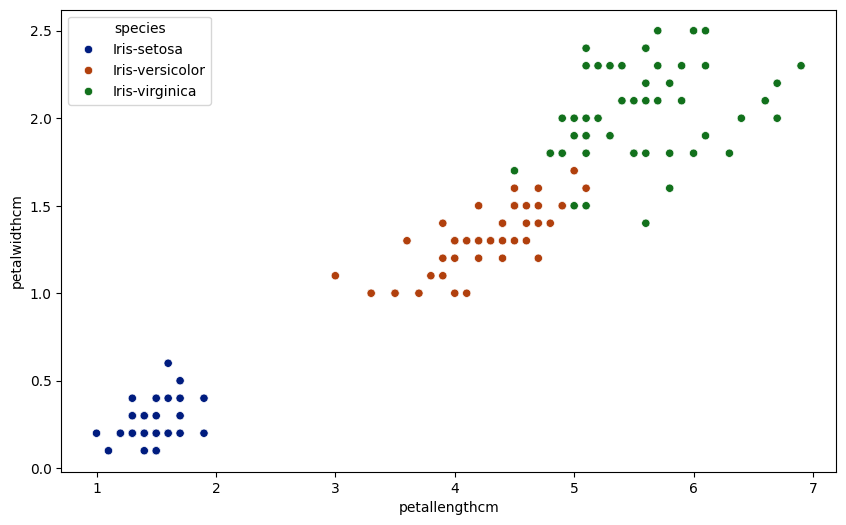

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['petallengthcm'], y = df['petalwidthcm'], hue = df['species'], palette = 'dark')
plt.show()

### Model Workflow

#### Feature-Target seperation

In [74]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

#### Train-Test split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Model Instantiation

In [76]:
model = LogisticRegression()

In [77]:
#model training
model.fit(X_train, y_train)

LogisticRegression()

In [78]:
#model testing
y_pred = model.predict(X_test)

#### Model Evaluation

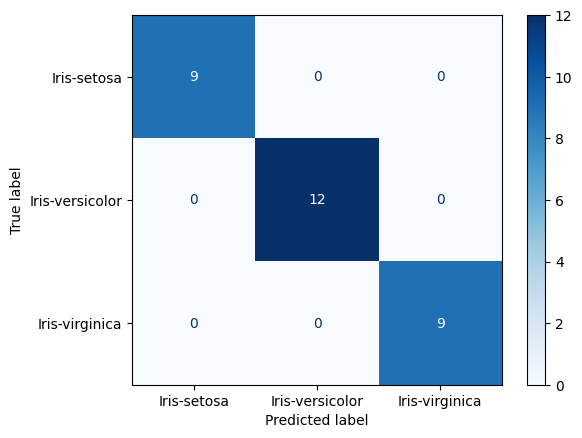

In [79]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot(cmap='Blues')
plt.show()

In [80]:
report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()
df_report = df_report.round(2)
print(df_report)

                 precision  recall  f1-score  support
Iris-setosa            1.0     1.0       1.0      9.0
Iris-versicolor        1.0     1.0       1.0     12.0
Iris-virginica         1.0     1.0       1.0      9.0
accuracy               1.0     1.0       1.0      1.0
macro avg              1.0     1.0       1.0     30.0
weighted avg           1.0     1.0       1.0     30.0
